<a href="https://colab.research.google.com/github/mixxdupp/fire-detection/blob/main/forestfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile("/content/archive (22).zip", mode='r') as archive:
  archive.extractall()

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/forest_fire/Training and Validation",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/forest_fire/Testing",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.8175 - loss: 0.3835 - val_accuracy: 0.8529 - val_loss: 0.3638
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9471 - loss: 0.1407 - val_accuracy: 0.9118 - val_loss: 0.2472
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9563 - loss: 0.1199 - val_accuracy: 0.9412 - val_loss: 0.2234
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9583 - loss: 0.1231 - val_accuracy: 0.8676 - val_loss: 0.2889
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9652 - loss: 0.1145 - val_accuracy: 0.9412 - val_loss: 0.1386
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9545 - loss: 0.1384 - val_accuracy: 0.8529 - val_loss: 0.2781
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9777 - loss: 0.0772 - val_accuracy: 0.9559 - val_loss: 0.1635
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9803 - loss: 0.0585 - val_accuracy: 0.8971 - val_loss: 0.

In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step


In [ ]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(len(predictions))

68


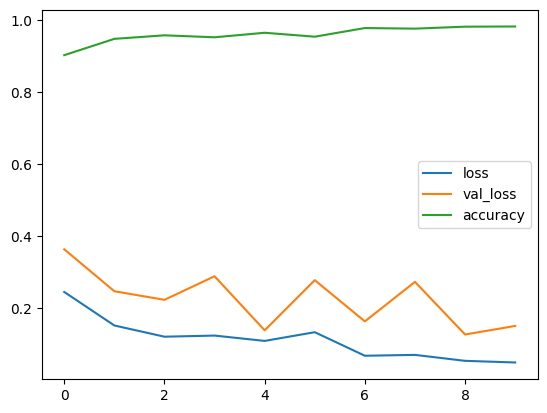

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

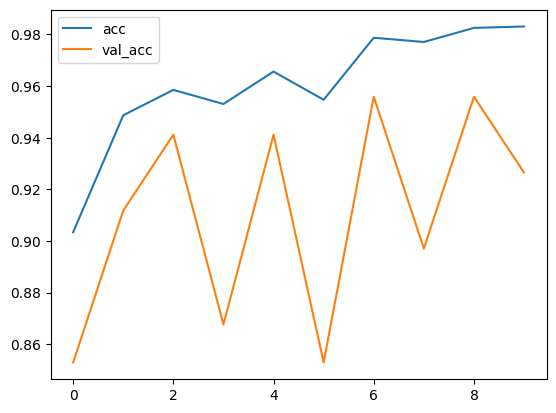

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[[0.]]


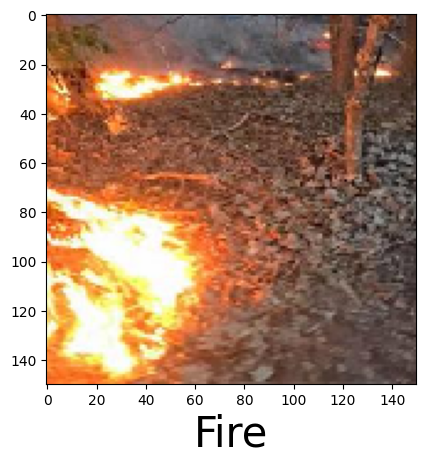

In [ ]:
predictImage("/content/forest_fire/Testing/fire/abc169.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[1.]]


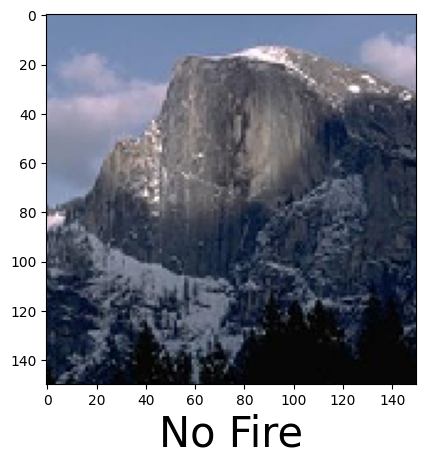

In [ ]:
predictImage('/content/forest_fire/Testing/nofire/abc335.jpg')